In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import xlwt
import random

In [5]:
results = pd.read_csv('result.csv')

In [7]:
results.describe()

,sku_id,price,cate,para_1,para_2,para_3,output,prediction
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,49325.439534,565.125557,72.821514,197.448818,0.505310,0.675574,21.044878,28.365745
std,28863.319965,558.479647,31.851351,3996.314552,2.012782,2.330312,87.015800,103.093396
min,43.000000,8.300000,1.000000,0.080000,-1.000000,-1.000000,0.000000,0.524362
25%,24032.500000,191.800000,46.000000,37.135000,-1.000000,-1.000000,0.000000,2.861903
50%,49159.000000,456.400000,83.000000,82.540000,-1.000000,-1.000000,3.000000,6.103437
75%,74390.500000,769.000000,101.000000,159.095000,3.000000,3.000000,12.000000,17.939827
max,99328.000000,7156.500000,101.000000,215925.960000,6.000000,6.000000,2043.000000,1884.865197


In [8]:
results['cate'].unique()

array([ 30, 101,   1,  83,  71,  46])

In [10]:
len(results['para_1'].unique())

2650

In [11]:
len(results['para_2'].unique())

7

In [12]:
len(results['para_3'].unique())

7

In [ ]:

## para_3: supplier
##         JD itself
##         other: ABCDEF
## para_2: delivery methods/ estimated delivery date
##         JD delivery system
##         other: ABCDEF

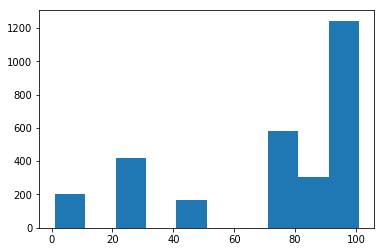

In [22]:
plt.hist(results['cate'])
plt.show()

In [23]:
order = pd.read_csv('jdata_user_order.csv')

order['o_date'] = pd.to_datetime(order['o_date'])

order_desc = pd.merge(order[order['o_date'] < '2017-4-16'], results, left_on = 'sku_id', right_on = 'sku_id', how = 'inner')

order_desc = order_desc.drop(['output', 'prediction'], axis = 1)
order_desc = order_desc.drop(['user_id'], axis = 1)
order_desc = order_desc.drop(['order_time'], axis = 1)
order_desc
order_desc.to_csv('order_desc_pre.csv')

In [72]:
order_desc['week_start_date'] = order_desc['o_date'].apply(lambda x : x-datetime.timedelta(days=x.weekday()))
order_desc

,sku_id,o_id,o_date,o_area,o_sku_num,price,cate,para_1,para_2,para_3,week_start_date
0,80036,480066,2017-03-09,14,1,511.8,101,189.25,3,4,2017-03-06
1,80036,542604,2017-04-14,14,1,511.8,101,189.25,3,4,2017-04-10
2,80036,42502,2017-03-22,14,2,511.8,101,189.25,3,4,2017-03-20
3,80036,15405,2016-07-11,10,1,511.8,101,189.25,3,4,2016-07-11
4,80036,381971,2016-08-16,10,1,511.8,101,189.25,3,4,2016-08-15
...,...,...,...,...,...,...,...,...,...,...,...
671991,18004,578634,2016-12-05,9,1,362.5,101,82.00,2,4,2016-12-05
671992,18004,410203,2016-09-23,22,2,362.5,101,82.00,2,4,2016-09-19
671993,18004,277343,2017-02-07,7,1,362.5,101,82.00,2,4,2017-02-06
671994,18004,530896,2016-10-12,22,4,362.5,101,82.00,2,4,2016-10-10


In [61]:
results_match = pd.read_csv('result_match_order.csv')

results_match['o_date'] = pd.to_datetime(results_match['o_date'])

results_match = results_match.drop(['prediction'], axis = 1)
results_match 

In [176]:
results_match = results_match.drop(['shipping cost'], axis = 1)

In [73]:
results_match ['week_start_date'] = results_match ['o_date'].apply(lambda x : x+datetime.timedelta(days=1))
results_match 

,sku_id,o_id,o_date,o_area,o_sku_num,price,cate,para_1,para_2,para_3,week_start_date
0,10033,-999,2017-04-16,-999,4.721317,1375.3,30,667.43,-1,-1,2017-04-17
1,10055,-999,2017-04-16,-999,0.558411,525.7,101,182.77,4,2,2017-04-17
2,10153,-999,2017-04-16,-999,1.499262,800.1,101,65.39,4,4,2017-04-17
3,10168,-999,2017-04-16,-999,13.189678,150.3,1,21.66,-1,-1,2017-04-17
4,10196,-999,2017-04-16,-999,12.166685,142.9,83,3.15,-1,-1,2017-04-17
...,...,...,...,...,...,...,...,...,...,...,...
2914,99328,-999,2017-04-16,-999,6.203643,210.2,1,21.19,-1,-1,2017-04-17
2915,9943,-999,2017-04-16,-999,5.766764,145.8,101,324.88,2,4,2017-04-17
2916,9946,-999,2017-04-16,-999,11.482072,201.9,101,87.26,2,3,2017-04-17
2917,9975,-999,2017-04-16,-999,13.906619,184.1,101,43.61,2,5,2017-04-17


In [179]:
order_desc['shipping cost'] = (order_desc['sku_id']*31 + order_desc['o_area'] * 31^2 ) % 3 + 0.5
order_desc['delivery days'] = (order_desc['sku_id']*11 + order_desc['o_area'] * 11^2 + order_desc['o_id']) % 2 + 1 +np.random.randint(4,size=671996)
order_desc

,sku_id,o_id,o_date,o_area,o_sku_num,price,cate,para_1,para_2,para_3,week_start_date,shipping cost,delivery days
0,80036,480066,2017-03-09,14,1,511.8,101,189.25,3,4,2017-03-06,2.5,1
1,80036,542604,2017-04-14,14,1,511.8,101,189.25,3,4,2017-04-10,2.5,1
2,80036,42502,2017-03-22,14,2,511.8,101,189.25,3,4,2017-03-20,2.5,1
3,80036,15405,2016-07-11,10,1,511.8,101,189.25,3,4,2016-07-11,1.5,4
4,80036,381971,2016-08-16,10,1,511.8,101,189.25,3,4,2016-08-15,1.5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671991,18004,578634,2016-12-05,9,1,362.5,101,82.00,2,4,2016-12-05,2.5,2
671992,18004,410203,2016-09-23,22,2,362.5,101,82.00,2,4,2016-09-19,0.5,5
671993,18004,277343,2017-02-07,7,1,362.5,101,82.00,2,4,2017-02-06,1.5,1
671994,18004,530896,2016-10-12,22,4,362.5,101,82.00,2,4,2016-10-10,0.5,2


In [180]:
db = pd.concat([order_desc, results_match])

/Users/tianyuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [181]:
db

,cate,delivery days,o_area,o_date,o_id,o_sku_num,para_1,para_2,para_3,price,shipping cost,sku_id,week_start_date
0,101,1.0,14,2017-03-09,480066,1.000000,189.25,3,4,511.8,2.5,80036,2017-03-06
1,101,1.0,14,2017-04-14,542604,1.000000,189.25,3,4,511.8,2.5,80036,2017-04-10
2,101,1.0,14,2017-03-22,42502,2.000000,189.25,3,4,511.8,2.5,80036,2017-03-20
3,101,4.0,10,2016-07-11,15405,1.000000,189.25,3,4,511.8,1.5,80036,2016-07-11
4,101,3.0,10,2016-08-16,381971,1.000000,189.25,3,4,511.8,1.5,80036,2016-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1,NaN,-999,2017-04-16,-999,6.203643,21.19,-1,-1,210.2,NaN,99328,2017-04-17
2915,101,NaN,-999,2017-04-16,-999,5.766764,324.88,2,4,145.8,NaN,9943,2017-04-17
2916,101,NaN,-999,2017-04-16,-999,11.482072,87.26,2,3,201.9,NaN,9946,2017-04-17
2917,101,NaN,-999,2017-04-16,-999,13.906619,43.61,2,5,184.1,NaN,9975,2017-04-17


In [70]:
## sunday is the start of a week
db['week_start_date'] = db['o_date'].apply(lambda x : x-datetime.timedelta(days=x.weekday()))

In [78]:
db.sort_values(by="o_date")

,sku_id,o_id,o_date,o_area,o_sku_num,price,cate,para_1,para_2,para_3,week_start_date
332518,39975,294344,2016-05-01,30,11.000000,220.8,30,52.68,-1,-1,2016-04-25
414103,86925,194975,2016-05-01,17,1.000000,201.6,101,78.47,2,5,2016-04-25
345417,43596,649214,2016-05-01,8,3.000000,329.5,30,120.69,-1,-1,2016-04-25
637586,21900,138415,2016-05-01,10,1.000000,669.2,71,38.60,-1,-1,2016-04-25
345403,43596,400275,2016-05-01,13,1.000000,329.5,30,120.69,-1,-1,2016-04-25
...,...,...,...,...,...,...,...,...,...,...,...
975,39132,-999,2017-04-16,-999,86.949060,233.0,30,39.88,-1,-1,2017-04-17
976,39159,-999,2017-04-16,-999,6.716277,470.9,30,125.38,-1,-1,2017-04-17
977,39179,-999,2017-04-16,-999,5.550475,132.7,83,11.67,-1,-1,2017-04-17
979,39204,-999,2017-04-16,-999,108.024342,570.7,30,117.25,-1,-1,2017-04-17


In [141]:
np.random.randint(3,size=674915)

array([2, 0, 1, ..., 2, 1, 1])

In [182]:
## map cate and param
## map shipping cost and delivery dates and stocks

## cate: 
##      101: electronic device and its accessories
##      71: grocery & gourmet food
##      30: Home and Kitchen
##      46: Health and Household
##      1: sports and outdoors
##      83: Tools and Home Improvement

db['category'] = db['cate'].apply(lambda x: 'electronic device' if x == 101 \
                                  else 'grocery & gourmet food' if x == 71\
                                  else 'Home & Kitchen' if x == 30\
                                  else 'Health & Household' if x == 46\
                                  else 'Sports & Outdoors' if x == 1\
                                  else 'Tools and Home Improvement')



In [186]:
db = db.reset_index()
db = db.drop(['index'],axis = 1)
db

,cate,delivery days,o_area,o_date,o_id,o_sku_num,para_1,para_2,para_3,price,shipping cost,sku_id,week_start_date,category
0,101,1.0,14,2017-03-09,480066,1.000000,189.25,3,4,511.8,2.5,80036,2017-03-06,electronic device
1,101,1.0,14,2017-04-14,542604,1.000000,189.25,3,4,511.8,2.5,80036,2017-04-10,electronic device
2,101,1.0,14,2017-03-22,42502,2.000000,189.25,3,4,511.8,2.5,80036,2017-03-20,electronic device
3,101,4.0,10,2016-07-11,15405,1.000000,189.25,3,4,511.8,1.5,80036,2016-07-11,electronic device
4,101,3.0,10,2016-08-16,381971,1.000000,189.25,3,4,511.8,1.5,80036,2016-08-15,electronic device
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674910,1,NaN,-999,2017-04-16,-999,6.203643,21.19,-1,-1,210.2,NaN,99328,2017-04-17,Sports & Outdoors
674911,101,NaN,-999,2017-04-16,-999,5.766764,324.88,2,4,145.8,NaN,9943,2017-04-17,electronic device
674912,101,NaN,-999,2017-04-16,-999,11.482072,87.26,2,3,201.9,NaN,9946,2017-04-17,electronic device
674913,101,NaN,-999,2017-04-16,-999,13.906619,43.61,2,5,184.1,NaN,9975,2017-04-17,electronic device


In [193]:
db.loc[0:617996,:]['delivery days']

0         1.0
1         1.0
2         1.0
3         4.0
4         3.0
         ... 
617992    4.0
617993    5.0
617994    4.0
617995    2.0
617996    3.0
Name: delivery days, Length: 617997, dtype: float64

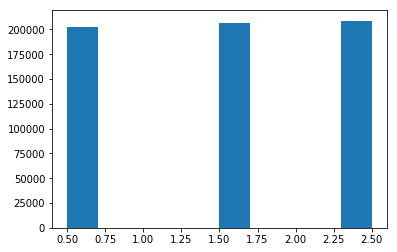

In [196]:
plt.hist(db.loc[0:617996,:]['shipping cost'])
plt.show()

In [197]:
db.to_excel('base_table.xlsx')

## TODO: fake stock 

# deal with shipping cost

In [198]:
db.head()

,cate,delivery days,o_area,o_date,o_id,o_sku_num,para_1,para_2,para_3,price,shipping cost,sku_id,week_start_date,category
0,101,1.0,14,2017-03-09,480066,1.0,189.25,3,4,511.8,2.5,80036,2017-03-06,electronic device
1,101,1.0,14,2017-04-14,542604,1.0,189.25,3,4,511.8,2.5,80036,2017-04-10,electronic device
2,101,1.0,14,2017-03-22,42502,2.0,189.25,3,4,511.8,2.5,80036,2017-03-20,electronic device
3,101,4.0,10,2016-07-11,15405,1.0,189.25,3,4,511.8,1.5,80036,2016-07-11,electronic device
4,101,3.0,10,2016-08-16,381971,1.0,189.25,3,4,511.8,1.5,80036,2016-08-15,electronic device


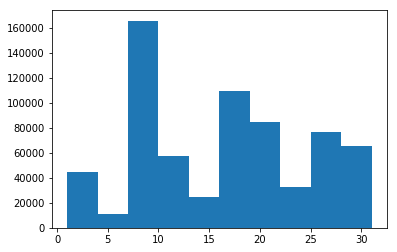

In [200]:
plt.hist(db[db['o_area'] != -999]['o_area'])
plt.show()

In [202]:
len(db['o_area'].unique())

32

In [223]:
## top 30 shipping cost items-YTD 
YTD_sh_cost_item_byarea = db[(db['o_date'] >= '2017-01-01') & (db['week_start_date'] < '2017-04-17')].groupby(['sku_id','o_area']).sum()[['shipping cost']]

In [224]:
YTD_sh_cost_item_byarea  = YTD_sh_cost_item_byarea .reset_index()

In [218]:
YTD_sh_cost_item = db[(db['o_date'] >= '2017-01-01') & (db['week_start_date'] < '2017-04-17')].groupby(['sku_id']).sum()[['shipping cost']].sort_values(by = ['shipping cost'], ascending = False)


In [230]:
YTD_sh_cost_item = YTD_sh_cost_item.reset_index()

In [236]:
## top 5 items correspinding area
Top_5_items_cost_area = pd.merge(YTD_sh_cost_item.head(5)['sku_id'], YTD_sh_cost_item_byarea, on = 'sku_id', how = 'inner').groupby('o_area').sum().sort_values(by = 'shipping cost', ascending = False)[['shipping cost']]

In [237]:
Top_10_items_cost_area = pd.merge(YTD_sh_cost_item.head(10)['sku_id'], YTD_sh_cost_item_byarea, on = 'sku_id', how = 'inner').groupby('o_area').sum().sort_values(by = 'shipping cost', ascending = False)[['shipping cost']]

Top_30_items_cost_area = pd.merge(YTD_sh_cost_item.head(30)['sku_id'], YTD_sh_cost_item_byarea, on = 'sku_id', how = 'inner').groupby('o_area').sum().sort_values(by = 'shipping cost', ascending = False)[['shipping cost']]



In [239]:
YTD_sh_cost_item.to_excel('YTD_sh_cost_item.xlsx')
Top_5_items_cost_area.to_excel('Top_5_items_cost_area.xlsx')
Top_10_items_cost_area.to_excel('Top_10_items_cost_area.xlsx')
Top_30_items_cost_area.to_excel('Top_30_items_cost_area.xlsx')

# deal with delivert time

In [256]:
YTD_sh_time_item = db[(db['o_date'] >= '2017-01-01') & (db['week_start_date'] < '2017-04-17')].groupby(['sku_id']).mean().sort_values(by = ['delivery days'], ascending = False)[['delivery days']]
YTD_sh_time_item = YTD_sh_time_item.reset_index()





In [257]:
YTD_sh_time_item 

,sku_id,delivery days
0,11598,5.000000
1,86580,5.000000
2,52617,5.000000
3,875,4.666667
4,2993,4.500000
...,...,...
2644,2885,1.000000
2645,20728,1.000000
2646,68388,1.000000
2647,35616,1.000000


In [258]:
## top 30 shipping cost items-YTD 
YTD_sh_time_item_byarea = db[(db['o_date'] >= '2017-01-01') & (db['week_start_date'] < '2017-04-17')].groupby(['sku_id','o_area']).mean()[['delivery days']]





In [261]:
YTD_sh_time_item_byarea = YTD_sh_time_item_byarea.reset_index()

In [262]:
Top_5_items_days_area = pd.merge(YTD_sh_time_item.head(5)['sku_id'], YTD_sh_time_item_byarea, on = 'sku_id', how = 'inner').groupby('o_area').mean().sort_values(by = 'delivery days', ascending = False)[['delivery days']]

Top_10_items_days_area = pd.merge(YTD_sh_time_item.head(10)['sku_id'], YTD_sh_time_item_byarea, on = 'sku_id', how = 'inner').groupby('o_area').mean().sort_values(by = 'delivery days', ascending = False)[['delivery days']]

Top_30_items_days_area = pd.merge(YTD_sh_time_item.head(30)['sku_id'], YTD_sh_time_item_byarea, on = 'sku_id', how = 'inner').groupby('o_area').mean().sort_values(by = 'delivery days', ascending = False)[['delivery days']]




In [263]:
Top_5_items_days_area

,delivery days
o_area,
8,5.0
17,5.0
18,5.0
27,5.0
30,4.5
21,4.0


In [265]:
YTD_sh_time_item.to_excel('YTD_sh_time_item.xlsx')
Top_5_items_days_area.to_excel('Top_5_items_time_area.xlsx')
Top_10_items_days_area.to_excel('Top_10_items_time_area.xlsx')
Top_30_items_days_area.to_excel('Top_30_items_time_area.xlsx')

# stock

In [270]:
stock = results[['sku_id', 'prediction']]

In [313]:
stock['stock'] = stock['prediction'].apply(lambda x: x + x * random.randint(-1,20))

/Users/tianyuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [314]:
stock

,sku_id,prediction,stock,surplus
0,10033,4.721317,94.426332,84.983699
1,10055,0.558411,4.467289,5.025700
2,10153,1.499262,23.988187,26.986711
3,10168,13.189678,263.793561,79.138068
4,10196,12.166685,12.166685,219.000332
...,...,...,...,...
2914,99328,6.203643,18.610928,74.443713
2915,9943,5.766764,5.766764,109.568510
2916,9946,11.482072,229.641444,-11.482072
2917,9975,13.906619,125.159569,-13.906619


In [315]:
import math

In [316]:
stock['stock'] = stock['stock'].apply(lambda x:max(0, x)  )

/Users/tianyuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [317]:
stock['surplus'] = stock['stock'] - stock['prediction']

/Users/tianyuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [318]:
stock['surplus'].describe()

count     2919.000000
mean       251.475284
std       1104.788683
min      -1615.848011
25%         11.537534
50%         45.740445
75%        150.112387
max      29258.156952
Name: surplus, dtype: float64

In [319]:
stock.sort_values(by = 'surplus')

,sku_id,prediction,stock,surplus
1846,65997,1615.848011,0.000000,-1615.848011
407,21634,267.851529,0.000000,-267.851529
2650,91572,260.311968,0.000000,-260.311968
1833,65672,224.588814,0.000000,-224.588814
1064,42033,153.034178,0.000000,-153.034178
...,...,...,...,...
2280,80036,1156.204540,12718.249940,11562.045400
1806,64469,770.964112,13106.389911,12335.425798
920,37440,1884.865197,20733.517167,18848.651970
2727,93883,1867.873109,29885.969744,28018.096635


In [320]:
stock[stock['surplus'] <= 0]

,sku_id,prediction,stock,surplus
4,10196,12.166685,12.166685,0.000000
10,10326,123.538744,123.538744,0.000000
20,10469,20.847707,0.000000,-20.847707
21,10510,3.480761,3.480761,0.000000
25,10685,8.879033,8.879033,0.000000
...,...,...,...,...
2897,98739,11.783425,0.000000,-11.783425
2900,98769,10.745452,0.000000,-10.745452
2905,9887,16.504874,16.504874,0.000000
2915,9943,5.766764,5.766764,0.000000


In [321]:
stock.to_excel('stock.xlsx')